# TITLE: Classification of a phishing website
# Problem Description

##### The problem is the detection of phishing websites, which are maliciour sites designed to decieve users and extract sensitive information such as login credentials, financial details, personal information, etc. The goal is to create a model that can distinguish between phishing websites and legitimate websites based on varous factors.

### Objective:

##### Build a model that predicts/classifies whether a website is a Phishing website.

## Attributes:

1) having_IP_Address
2) URL_Length
3) Shortening_Service
4) having_At_Symbol
5) double_slash_redirecting
6) Prefix_Suffix
7) having_Sub_Domain
8) SSLfinal_State
9) Domain_registration_length
10) Favicon
11) port
12) HTTPS_token
13) Request_URL
14) URL_of_Anchor
15) Links_in_tags
16) SFH
17) Submitting_to_email
18) Abnormal_URL
19) Redirect
20) on_mouseover
21) RightClick
22) popUpWidnow
23) Iframe
24) age_of_domain
25) DNSRecord
26) web_traffic
27) Page_Rank
28) Google_Index
29) Links_pointing_to_page
30) Statistical_report
31) Result

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report,roc_curve
from scipy.stats import zscore

# Dataset loading

In [3]:
df= pd.read_csv('Phishing Data - Phishing Data.csv')

In [4]:
# first view of the dataset
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


## Dataset rows and columns

In [5]:
# checking the number of rows and columns present in the dataset
shape= df.shape
print(f'The number of rows are {shape[0]} and, \n the number of columns are {shape[1]}')

The number of rows are 2456 and, 
 the number of columns are 31


## Understanding Variables

In [6]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [8]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# counting the number of unique values in the dataset
df['Result'].value_counts()

0    1362
1    1094
Name: Result, dtype: int64

In [10]:
# finding the total number of null values in the dataset
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

## Observation
1) The number of rows are 2456 and the number of columns are 31.
2) All the rows are integers
3) There is no missing value in the dataset.

## Data Visualization 

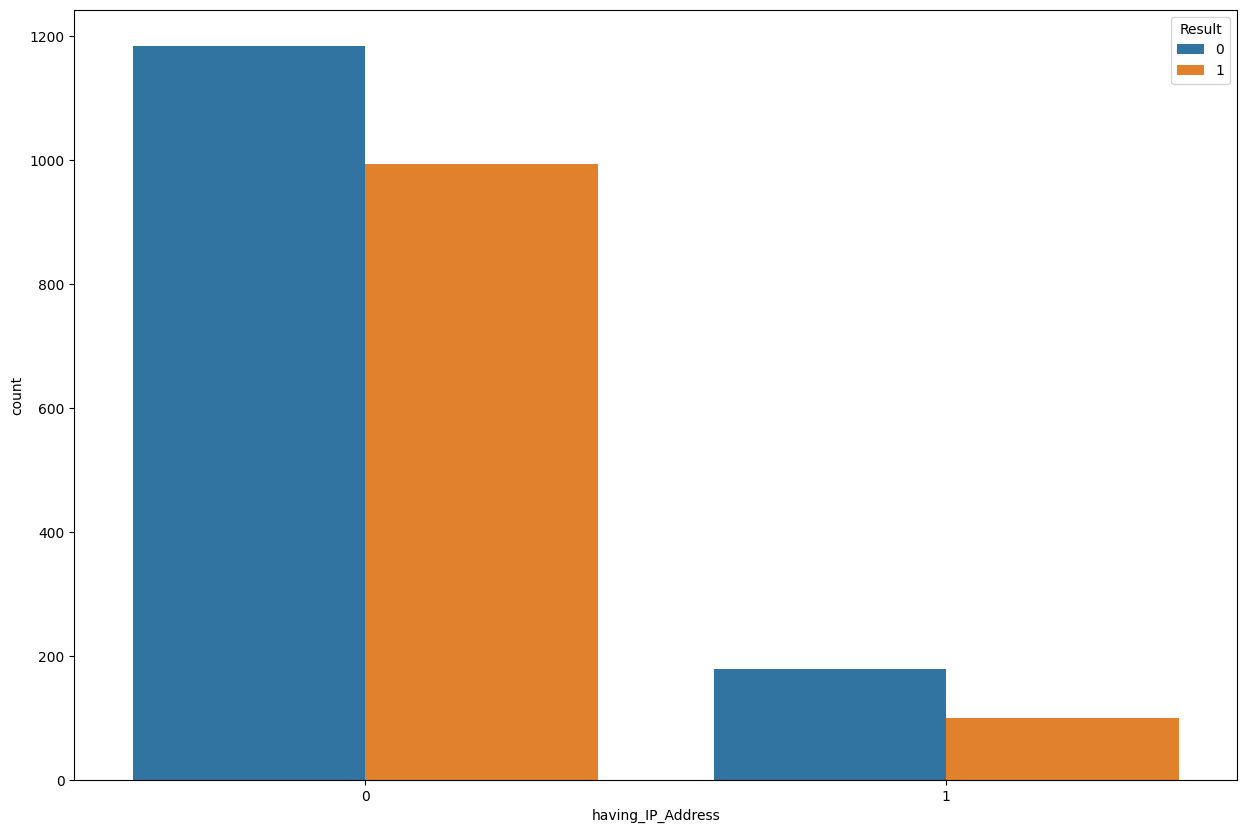

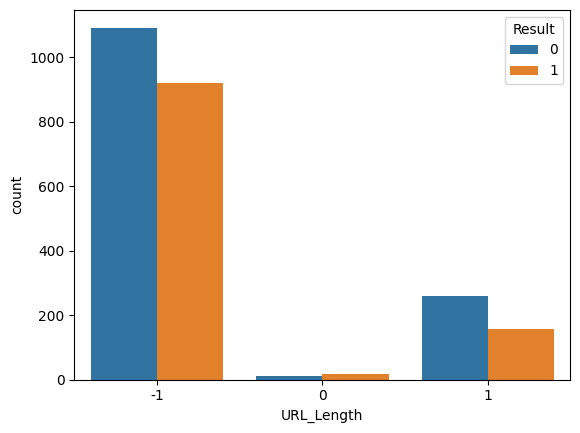

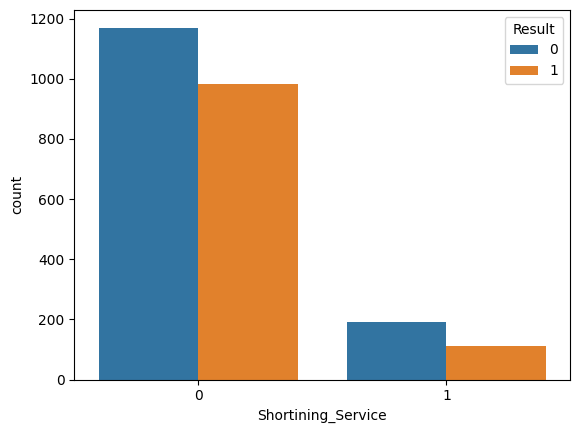

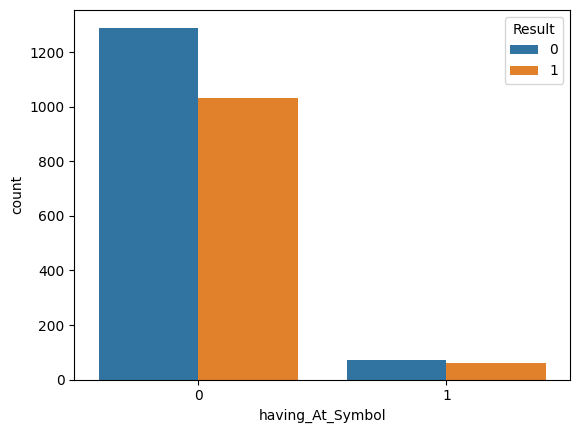

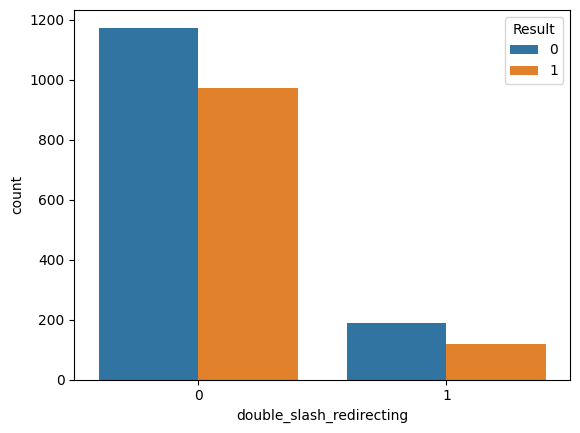

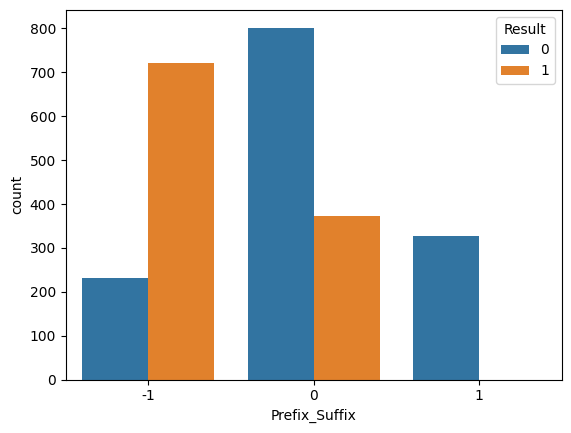

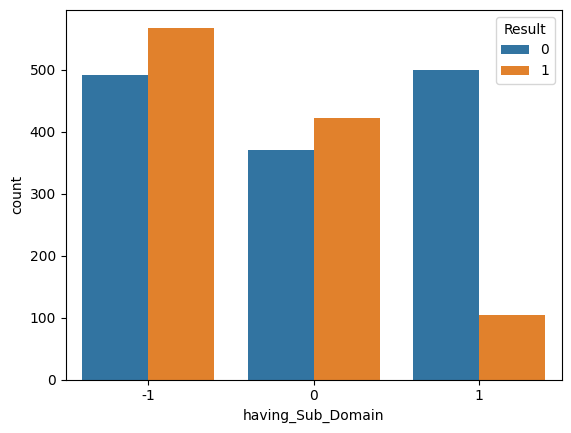

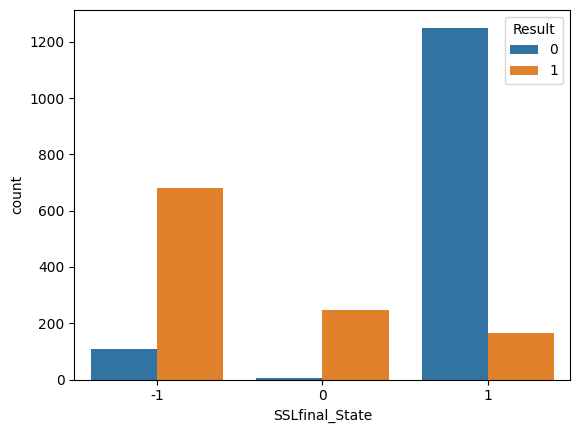

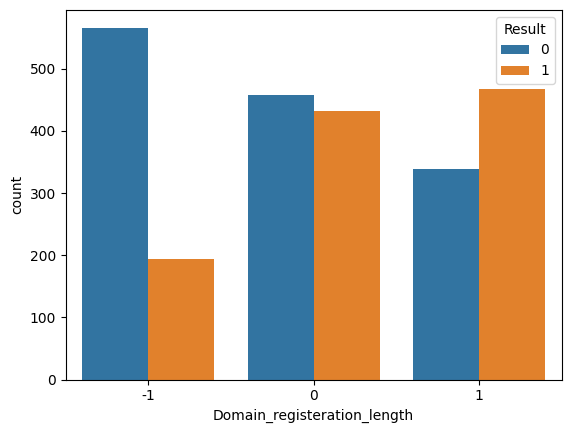

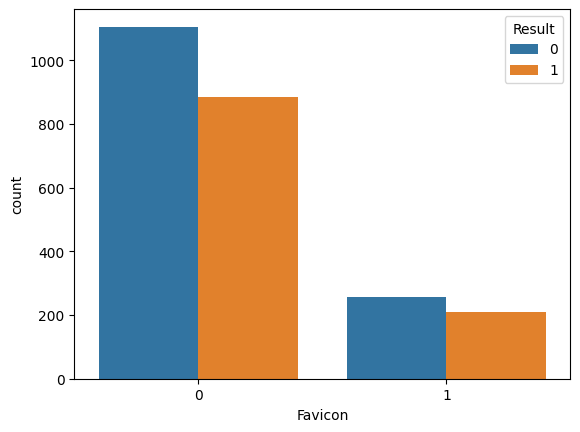

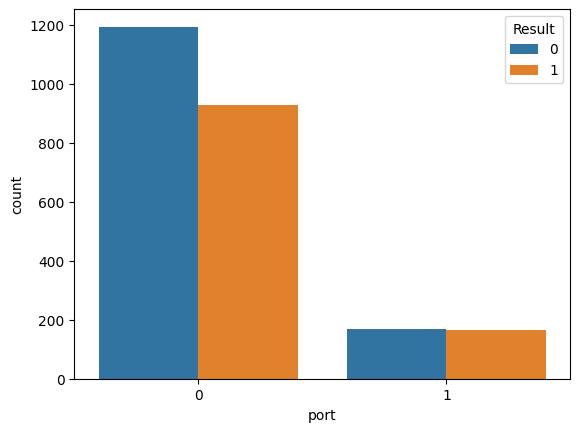

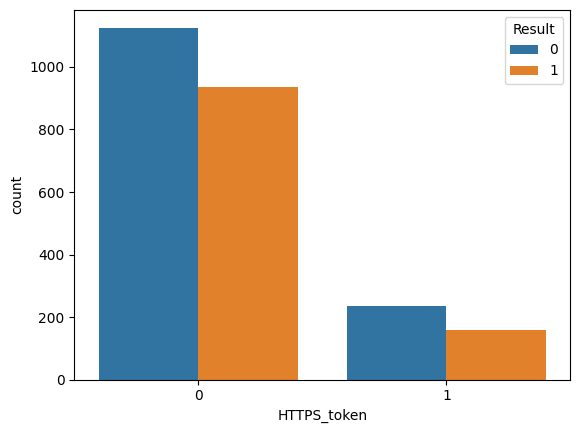

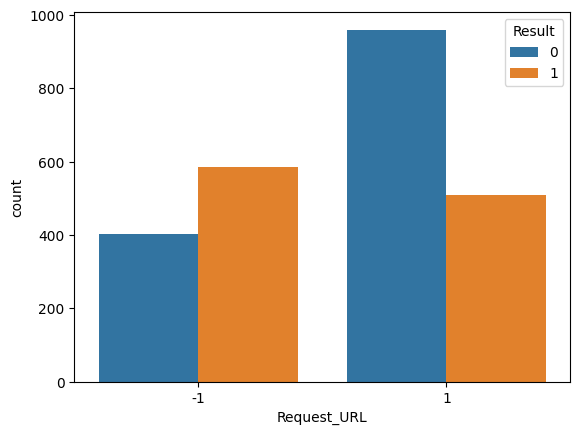

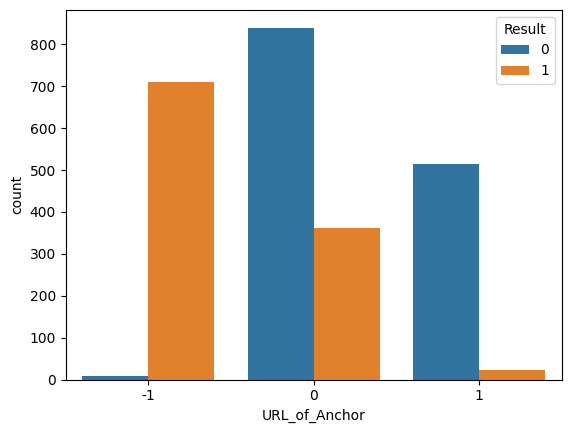

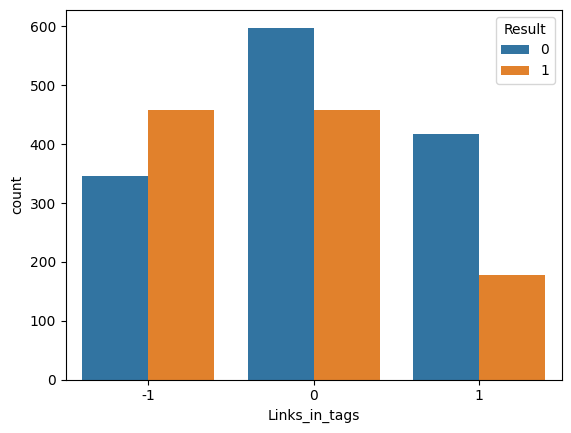

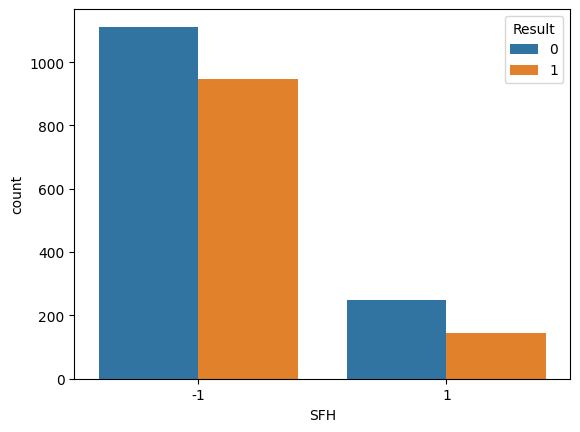

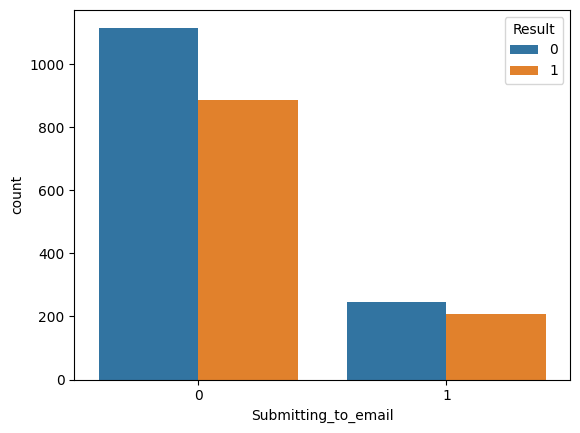

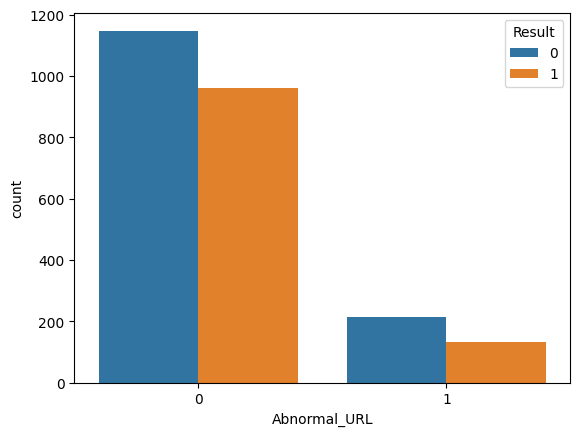

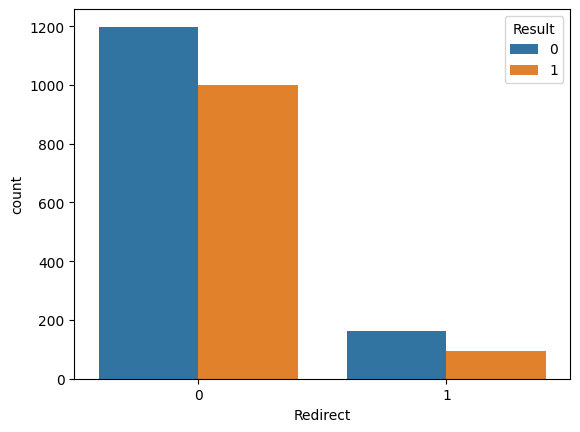

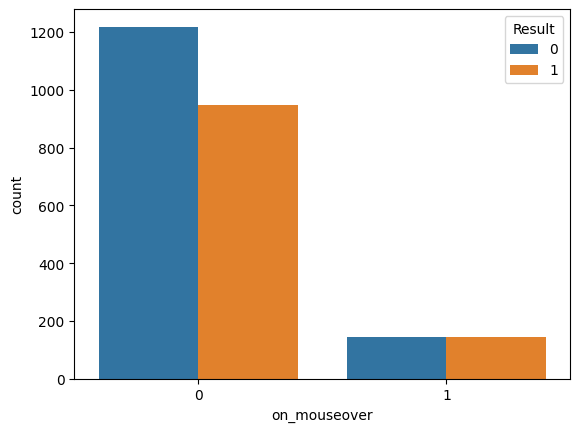

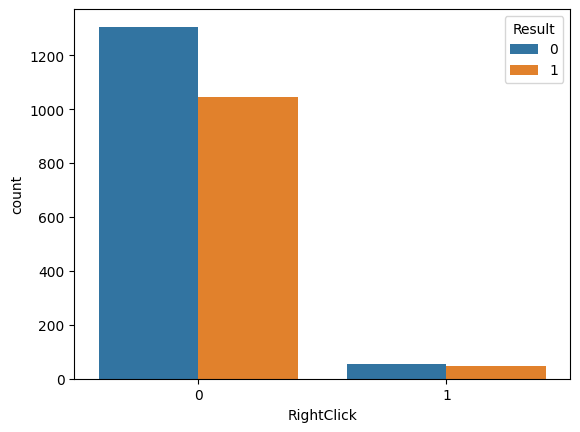

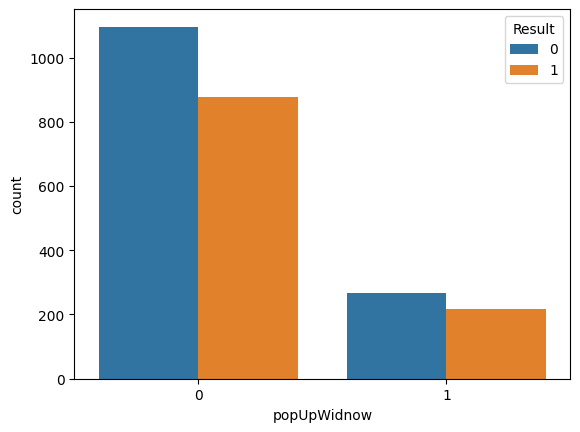

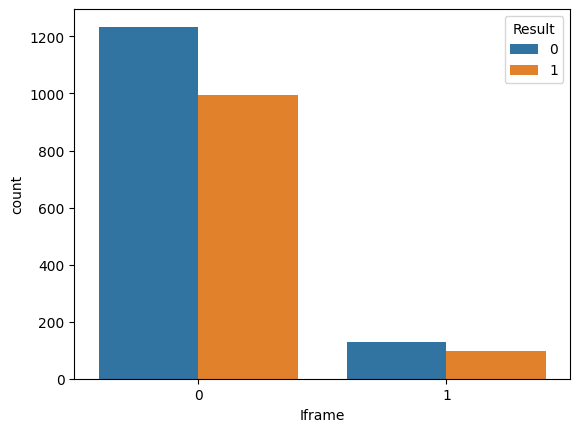

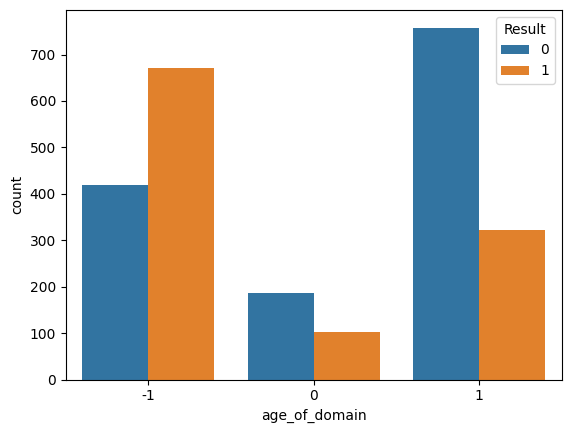

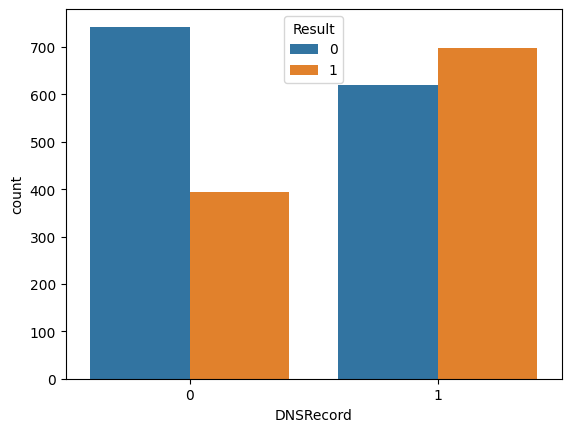

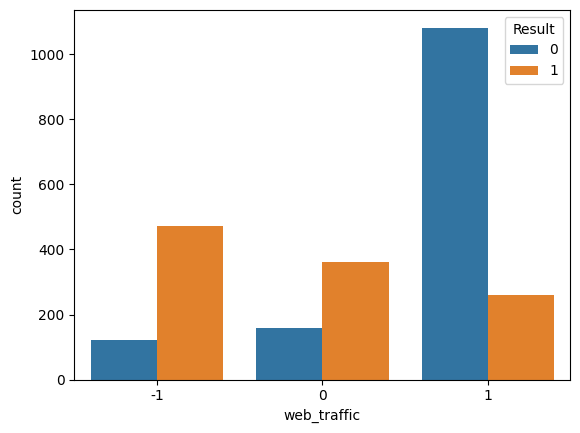

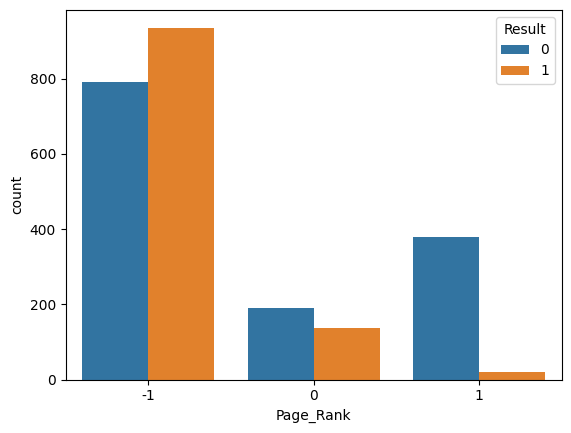

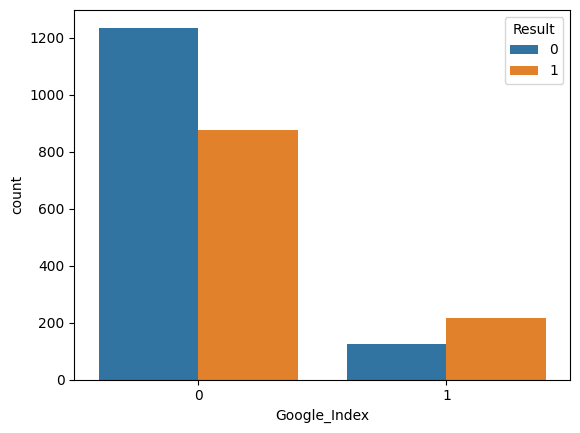

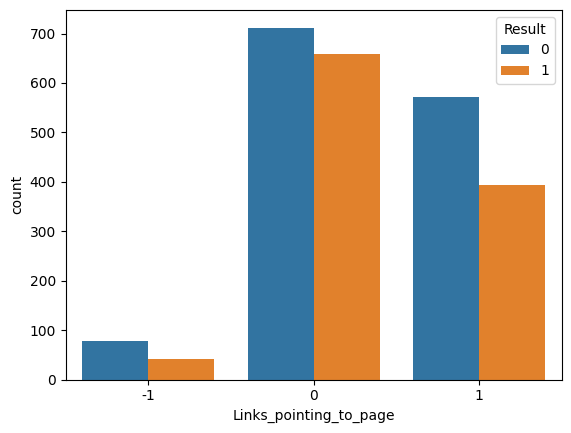

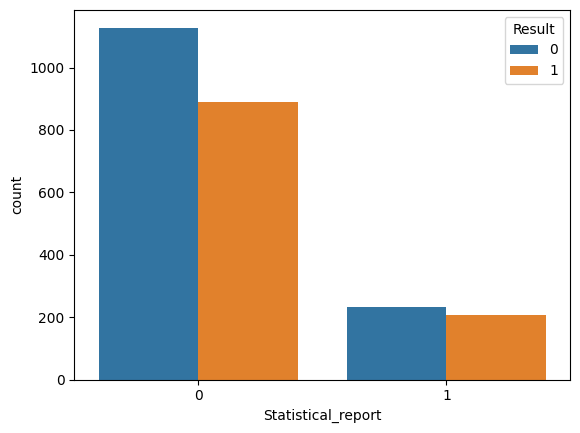

In [11]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1]):
    sns.countplot(x=column, hue='Result', data=df)
    plt.show()


<AxesSubplot: >

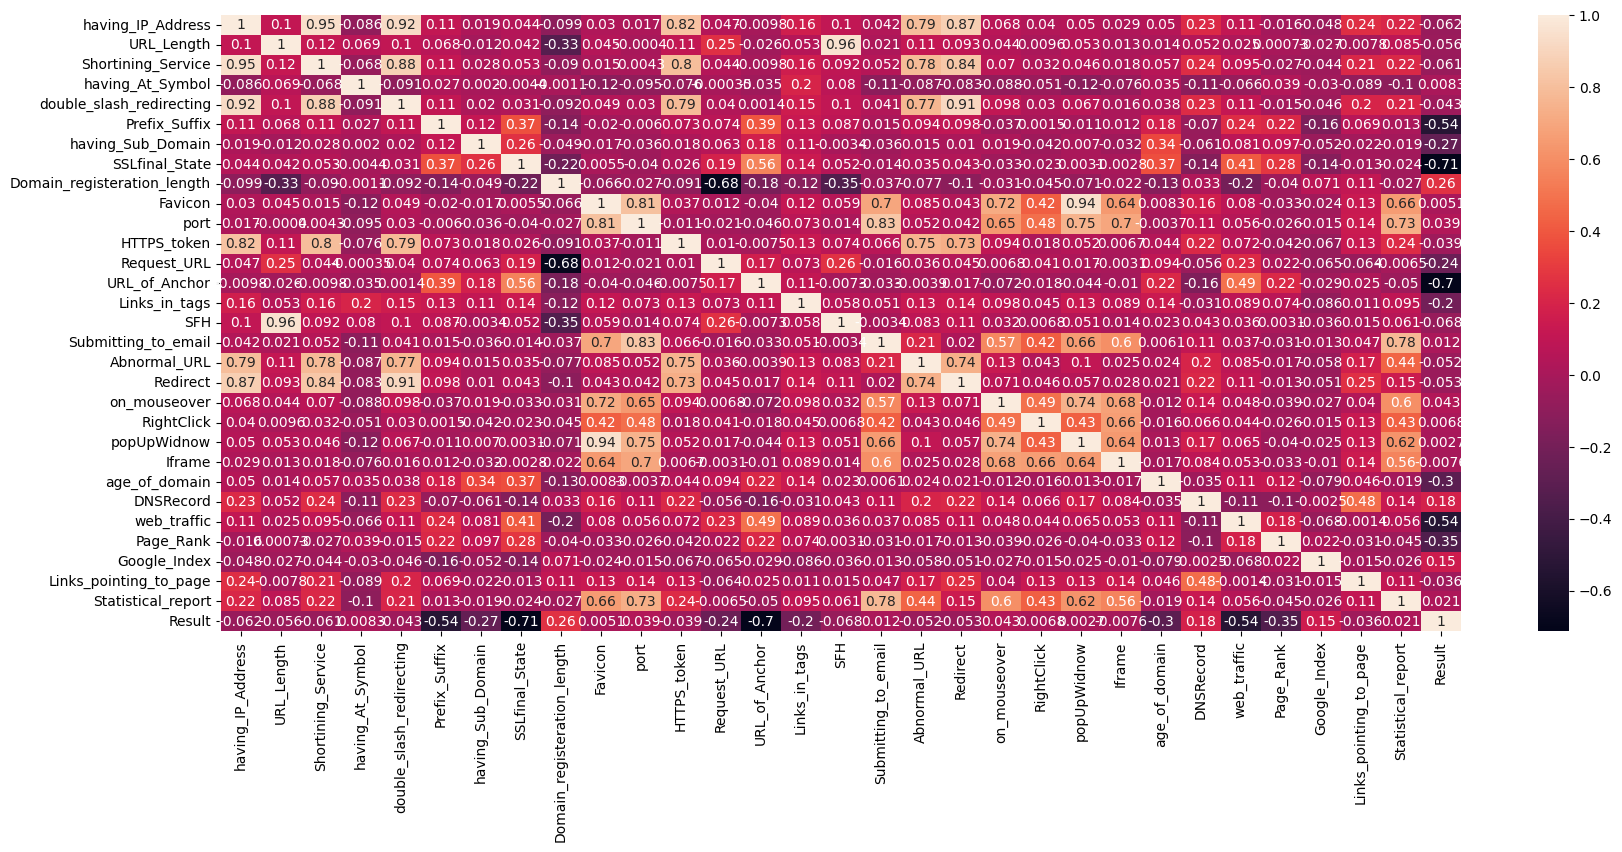

In [12]:
# Heatmap is used to check the correlation between the variables
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

In [13]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [14]:
## dropping the rows with multicollinearity
# Multicollinearity is a condition in which independent variables are collinear with each other. 
# Dropping all the columns with multicollinearity.

In [15]:
k = df.drop(labels=['Result','having_IP_Address','URL_Length','Shortining_Service','double_slash_redirecting',
                    'Favicon','port','SFH','Redirect','popUpWidnow','Abnormal_URL','Submitting_to_email','Statistical_report'],axis=1)

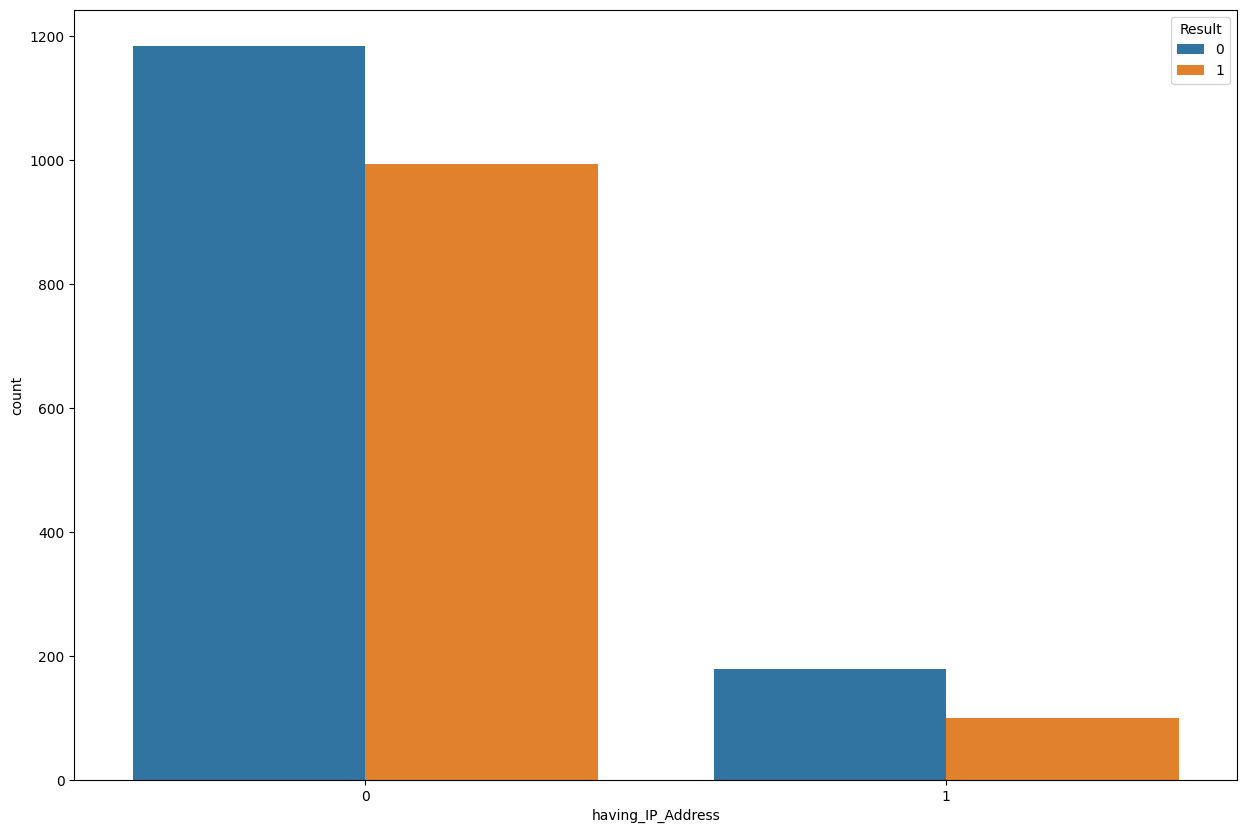

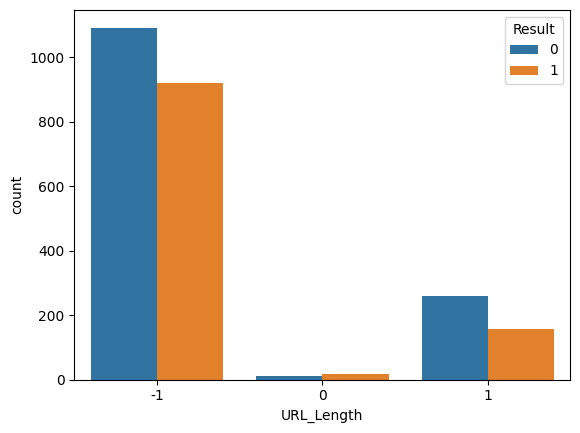

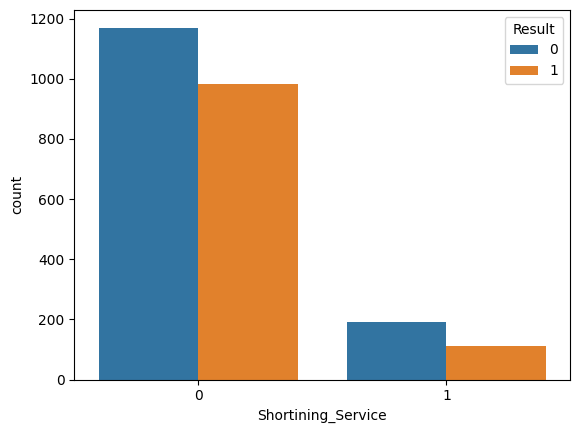

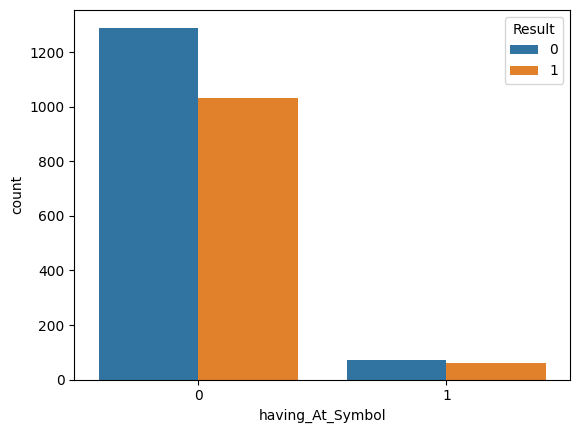

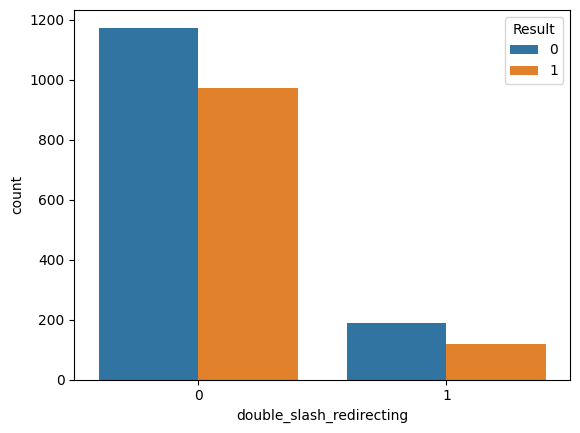

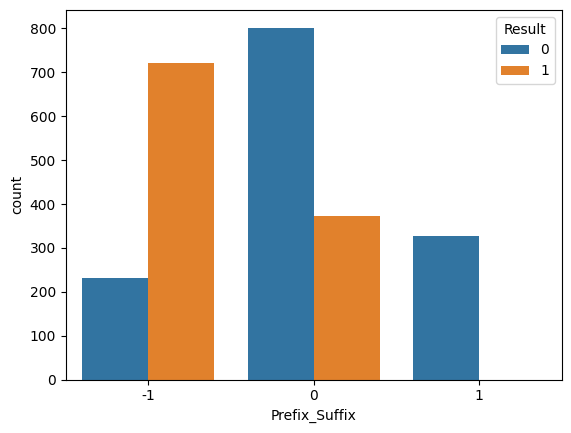

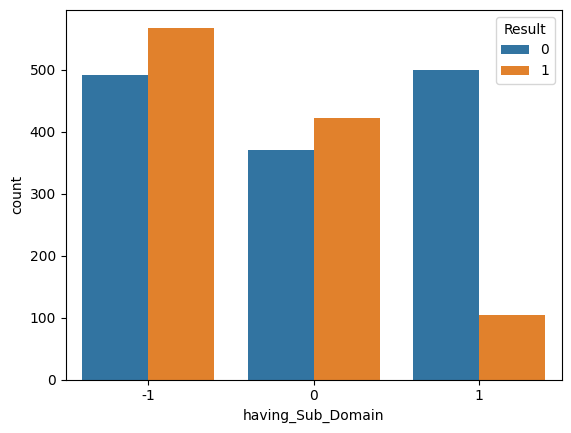

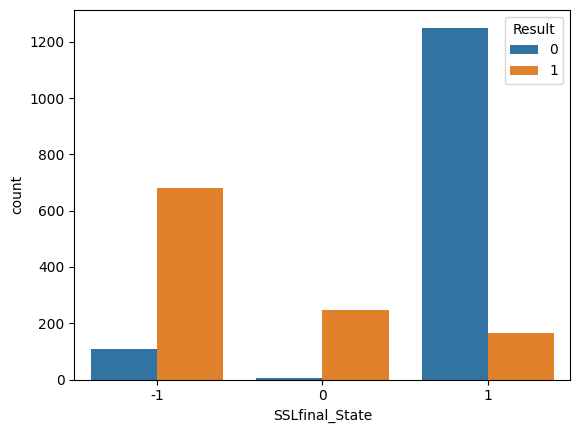

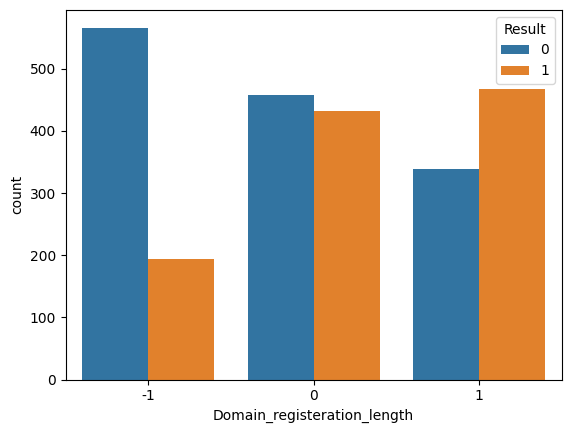

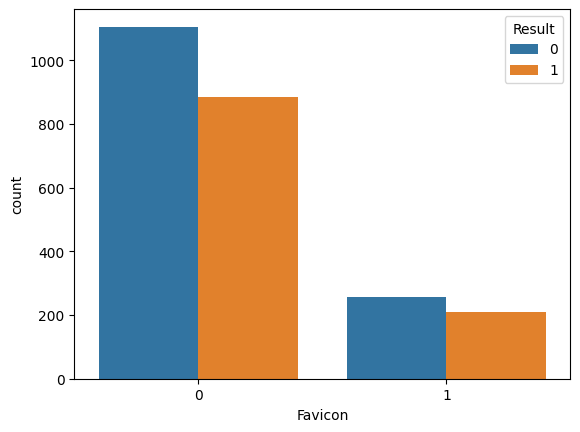

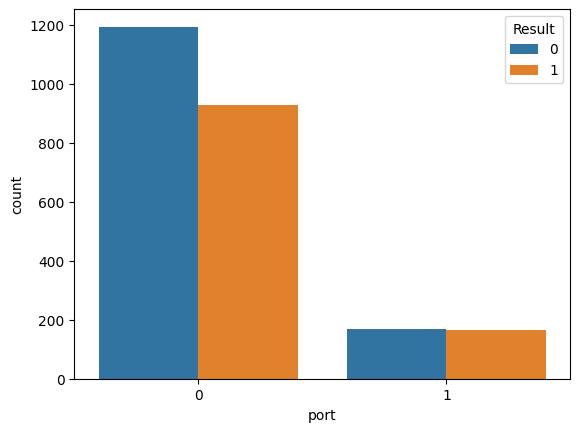

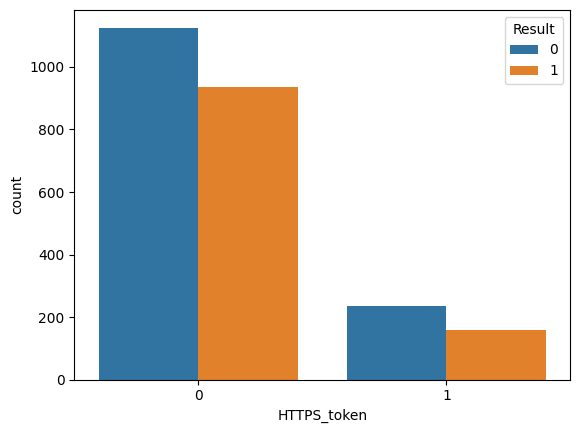

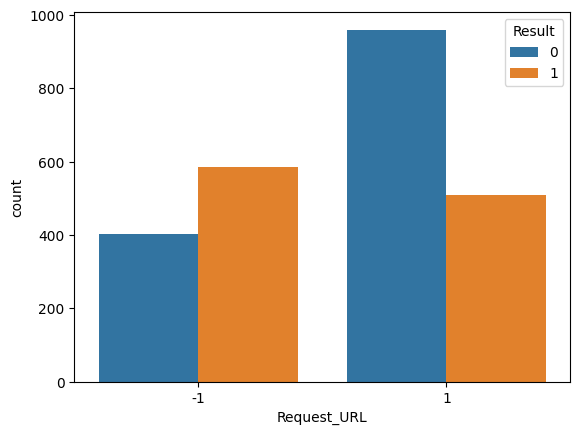

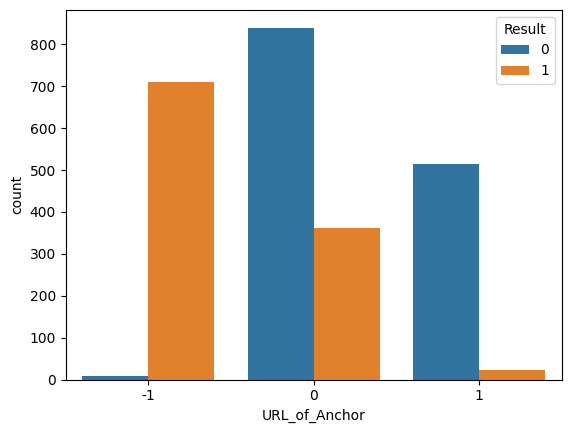

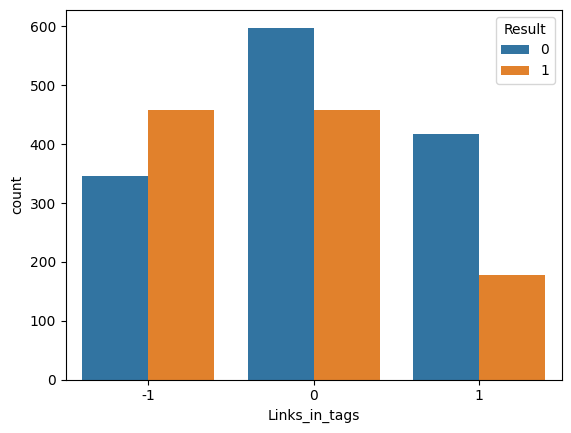

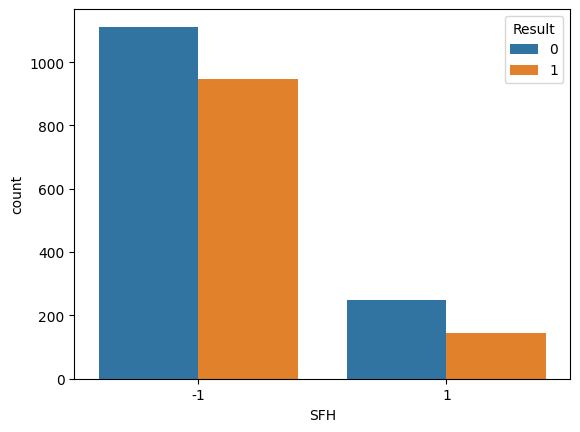

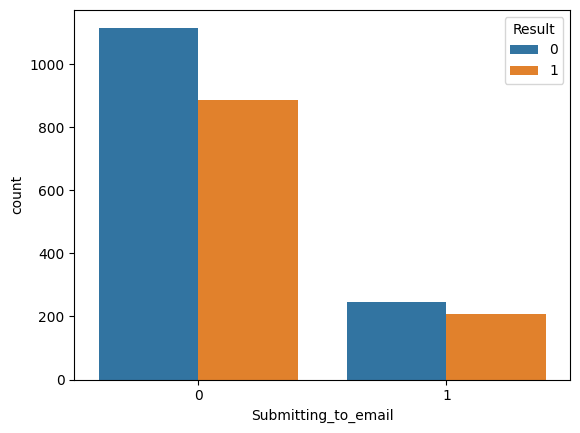

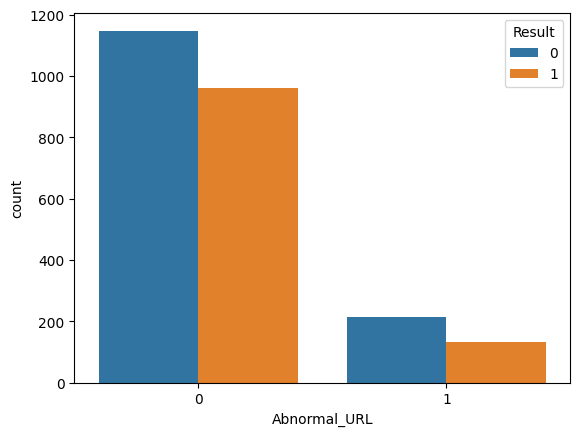

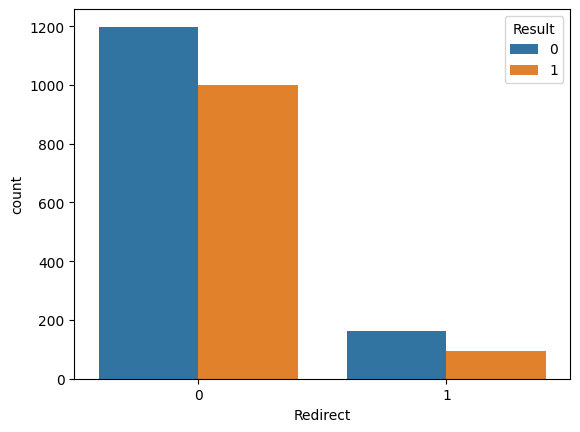

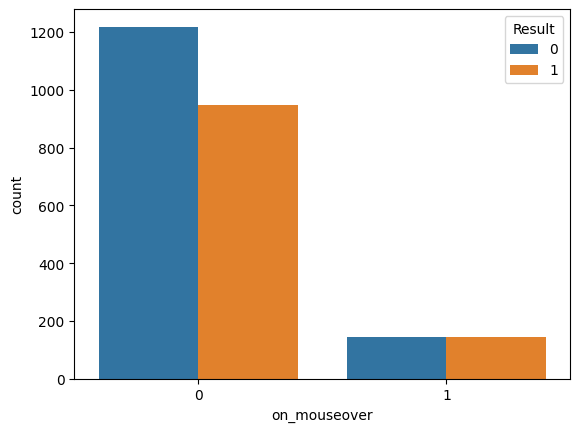

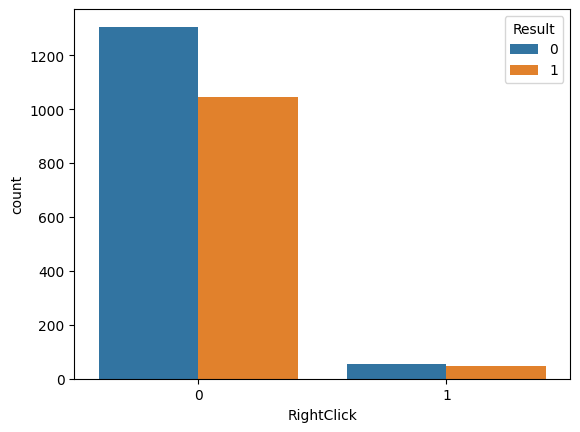

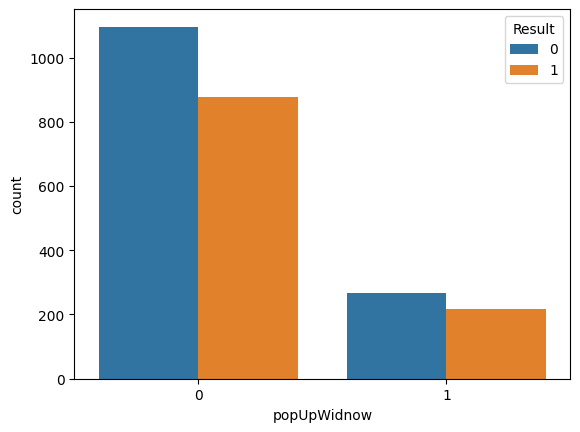

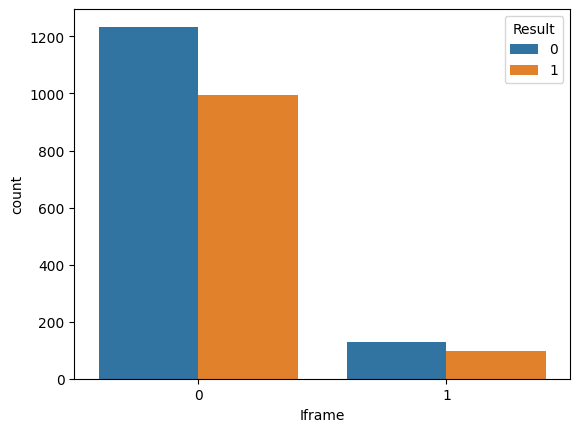

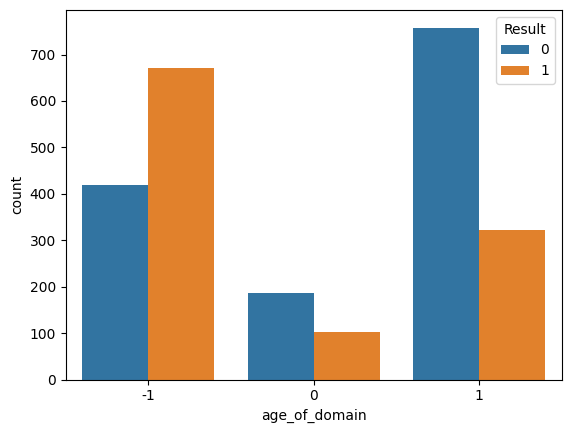

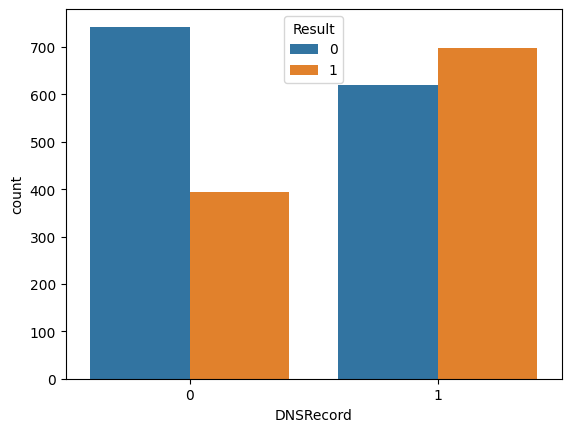

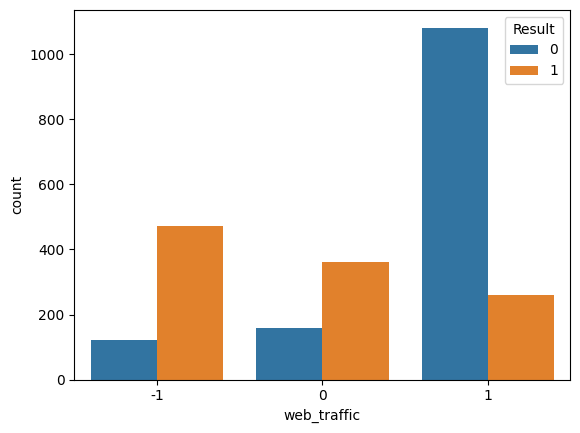

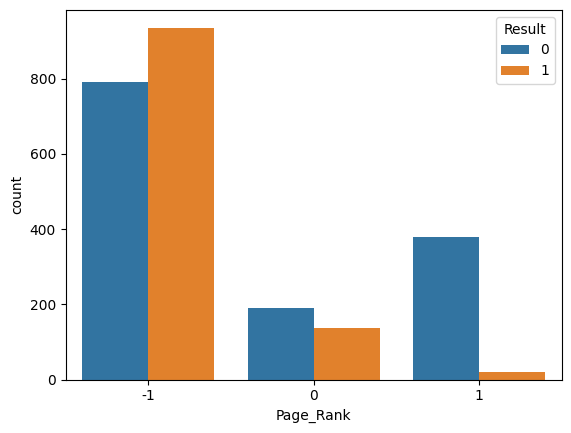

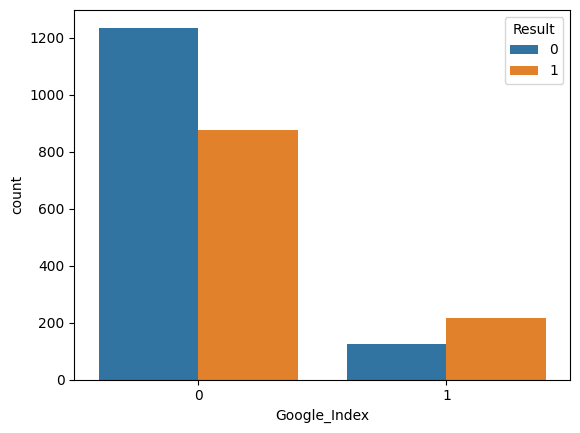

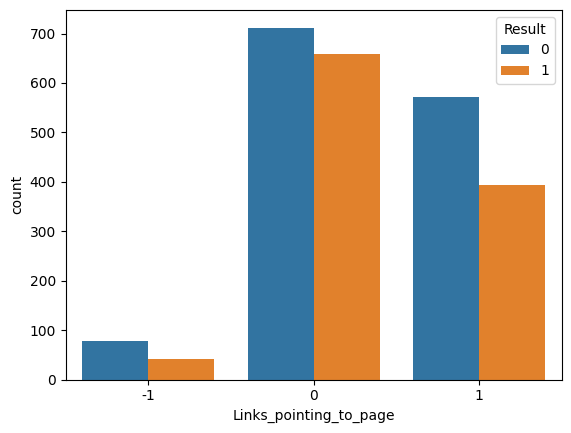

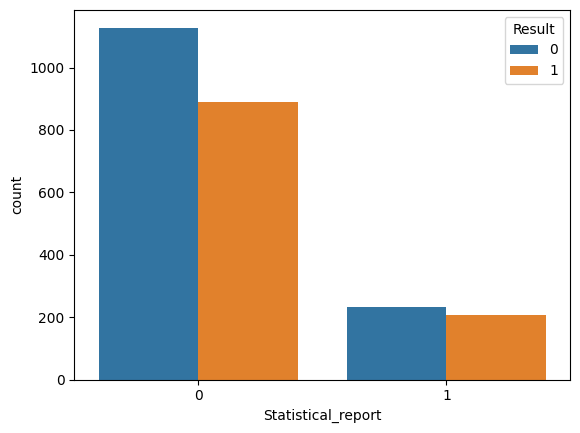

In [16]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1]):
#     plt.subplot(5, 6, i + 1)
    sns.countplot(x=column, hue='Result', data=df) #, palette='coolwarm')

    # plt.tight_layout()
    plt.show()


<AxesSubplot: >

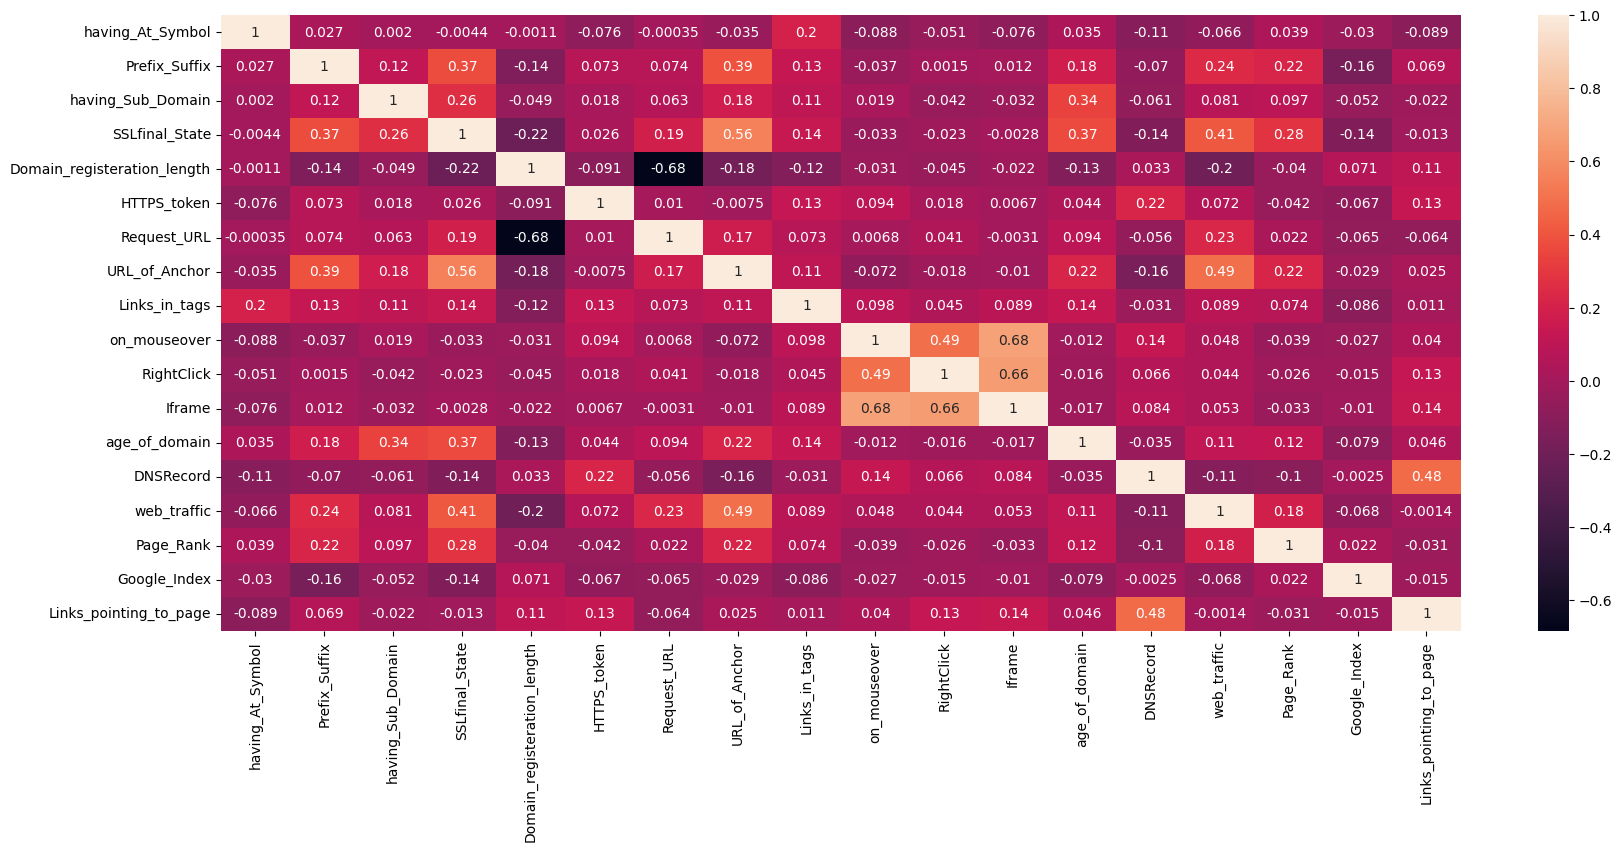

In [17]:
plt.figure(figsize = (20, 8))
sns.heatmap(k.corr(), annot = True)

## TRAIN AND TEST DATA

In [18]:
## taking x and y from the dataset.
X = df.drop(labels=['Result','having_IP_Address','URL_Length','Shortining_Service','double_slash_redirecting',
                    'Favicon','port','SFH','Redirect','popUpWidnow','Abnormal_URL','Submitting_to_email',
                    'Statistical_report'],axis=1).apply(zscore)
y= df['Result']

In [19]:
# to check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                        feature       VIF
0              having_At_Symbol  1.086352
1                 Prefix_Suffix  1.306261
2             having_Sub_Domain  1.175534
3                SSLfinal_State  1.807980
4   Domain_registeration_length  1.995325
5                   HTTPS_token  1.122255
6                   Request_URL  1.943413
7                 URL_of_Anchor  1.787933
8                 Links_in_tags  1.132156
9                  on_mouseover  1.985641
10                   RightClick  1.800988
11                       Iframe  2.604803
12                age_of_domain  1.269447
13                    DNSRecord  1.443331
14                  web_traffic  1.437189
15                    Page_Rank  1.129753
16                 Google_Index  1.059638
17       Links_pointing_to_page  1.406975


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   having_At_Symbol             2456 non-null   float64
 1   Prefix_Suffix                2456 non-null   float64
 2   having_Sub_Domain            2456 non-null   float64
 3   SSLfinal_State               2456 non-null   float64
 4   Domain_registeration_length  2456 non-null   float64
 5   HTTPS_token                  2456 non-null   float64
 6   Request_URL                  2456 non-null   float64
 7   URL_of_Anchor                2456 non-null   float64
 8   Links_in_tags                2456 non-null   float64
 9   on_mouseover                 2456 non-null   float64
 10  RightClick                   2456 non-null   float64
 11  Iframe                       2456 non-null   float64
 12  age_of_domain                2456 non-null   float64
 13  DNSRecord         

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

## ML MODEL IMPLEMENTATION

### Logistic regression

In [22]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [23]:
model.score(x_train, y_train)

0.9424083769633508

In [24]:
y_pred = model.predict(x_test)

In [25]:
test_score=model.score(x_test, y_test)
print(f"Test score is: {test_score}")

Test score is: 0.9470827679782904


In [26]:
recall_lr=recall_score(y_test,y_pred)

In [27]:
precision_lr=precision_score(y_test,y_pred)

In [28]:
f1score_lr=f1_score(y_test,y_pred)
print("f1score_lr :",f1score_lr)

f1score_lr : 0.9399075500770416


In [29]:
auc_roc=roc_auc_score(y_test,y_pred)
print("ROC_AUC score:",auc_roc)

ROC_AUC score: 0.946773904069637


In [30]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)  

[[393  21]
 [ 18 305]]


<AxesSubplot: >

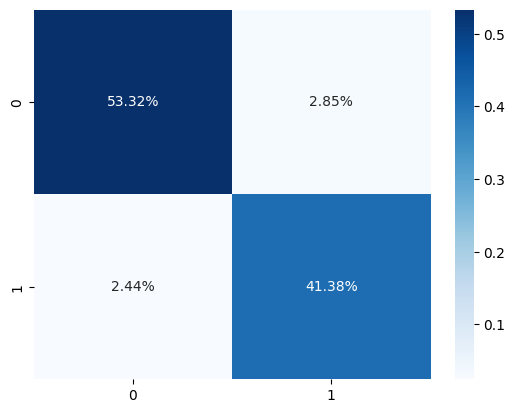

In [31]:
#printing confusion metrix.
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       414
           1       0.94      0.94      0.94       323

    accuracy                           0.95       737
   macro avg       0.95      0.95      0.95       737
weighted avg       0.95      0.95      0.95       737



### Support vector classifier

In [33]:
from sklearn.svm import SVC

In [34]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [35]:
svm_model.score(x_train, y_train)

0.9668411867364747

In [36]:
test_score=svm_model.score(x_test, y_test)
print(f"test score is: {test_score}")

test score is: 0.9592944369063772


### Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
train_score = forest.score(x_train, y_train)
test_score_forest = forest.score(x_test, y_test)
print("Training score:", train_score)
print("Test score:", test_score_forest)

Training score: 0.9930191972076788
Test score: 0.9742198100407056


# conclusion:
With 94% training accuracy and 94% testing accuracy, Logistic regression and Random forest has proven to be the most efficient model out of the algorithms used in our model including svc. The logistic regression shows a balanced precision, recall, and F1-score, making it a good choice for this classification task. The Random forest achieve slightly higher accuracy.